In [8]:
import numpy as np 
from astropy import units as u 
import matplotlib.pyplot as plt

Example of how to randomly generate events to sample initial position and direction. \
We will sample events across a surface sampling the radius and the polar angle.  

In [19]:

R_gen = 220  
N_event = 10000


def rnd_ro_uniform(R_gen, N_event): 
    r = R_gen * np.sqrt(np.random.uniform(0,1,size=N_event))
    alpha = np.random.uniform(0,2*np.pi, size=N_event) 
    x0 = r * np.cos(alpha)   
    y0 = r * np.sin(alpha)  
    z0 = np.zeros(N_event)
    return x0, y0, z0 

def rnd_ro(R_gen, N_event): 
    r = R_gen * np.random.uniform(0,1,size=N_event)
    alpha = np.random.uniform(0,2*np.pi, size=N_event) 
    x0 = r * np.cos(alpha)   
    y0 = r * np.sin(alpha)  
    z0 = np.zeros(N_event)
    return x0, y0, z0 

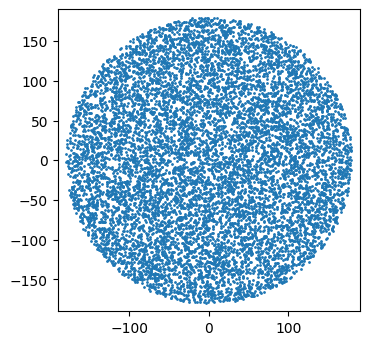

In [20]:
# To sample uniformly events on a circular area, the radius squarted must be sampled from a uniform distribution   

plt.figure(dpi=100)

initial_position = rnd_ro_uniform(R_tank, N_event)
plt.scatter(initial_position[0],initial_position[1],s=1)
plt.xlim(-190,190)
plt.ylim(-190,190)
plt.gca().set_aspect('equal')

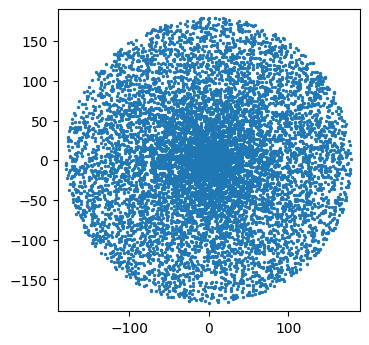

In [11]:
# If instead the radius is sampled uniformly, more events will be generated in the inner area of the circle    

plt.figure(dpi=100)

initial_position = rnd_ro(R_gen, N_event)
plt.scatter(initial_position[0],initial_position[1],s=2)
plt.xlim(-190,190)
plt.ylim(-190,190)
plt.gca().set_aspect('equal')



Let's call theta the azimuth angle. \
For what concerns the angluar distribution, the intensity of air showers particles scales as cos($\theta$) due to atmospheric attenuation. \
On top of that, a flat surface detector will have an effective area that scales as cos($\theta$) as well, since it's the perpendicular projection of the surface with respect to the direction of the incoming particle.   
To generate events that reflect these dependencies, we will sample the $\theta$ angle from a distribution that is uniform is cos $^2$($\theta$) 

In [25]:
def rnd_direction(N_event):
    phi = np.random.uniform(0,2*np.pi, size=N_event)

    theta_0 = 0 * u.deg 
    theta_1 = 30 * u.deg 
    cos_theta_squared = np.random.uniform(np.cos(theta_1.to(u.rad))**2,np.cos(theta_0.to(u.rad))**2, size=N_event)
    cos_theta = np.sqrt(cos_theta_squared)
    theta = np.arccos(cos_theta) 
    return theta, phi

Text(0.5, 0, '$\\Theta$')

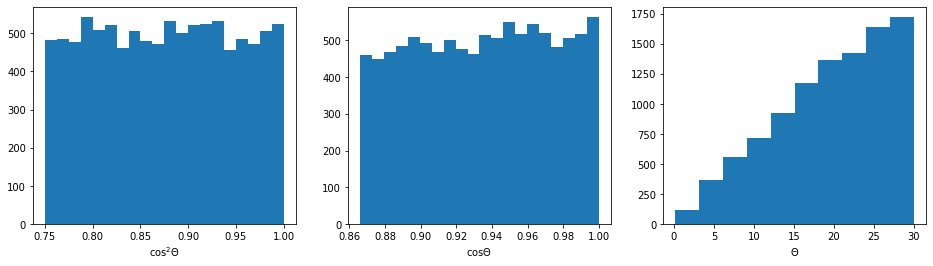

In [26]:
muon_theta, muon_phi = rnd_direction(N_event)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 4))
theta_hist = ax1.hist(np.cos(muon_theta)**2,bins=20)
ax1.set_xlabel('cos$^2\Theta$')
theta_hist = ax2.hist(np.cos(muon_theta),bins=20)
ax2.set_xlabel('cos$\Theta$')
theta_hist = ax3.hist(muon_theta*180/np.pi)
ax3.set_xlabel('$\Theta$')